## Noah Pishaki - Physics 490 - Assignment 9

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Problem: Code up Newton’s method for our example function $ f(x) = e^{x-\sqrt{x}} - x $ and use it to find out the roots.

#### Theory:

Taking the derivative of the given function $f(x) = e^{x-\sqrt{x}}-x $, 

$ f'(x) = \frac{d}{dx}(f(x)) $ 

$ \quad\quad\quad = \frac{d}{dx}(e^{x-\sqrt{x}}-x)$

$ \quad\quad\quad = \frac{d}{dx}(e^{x-\sqrt{x}}) - \frac{d}{dx}(x)$

$ \quad\quad\quad = \frac{d}{dx}(e^{x-\sqrt{x}}) - (1) $

 Utilizing the U-Substitution method, picking $ u $ such that $ \frac{de^u}{dx} = e^u $ 
 
 We will then pick $ u = x - \sqrt{x} \rarr du = 1-\frac{1}{2\sqrt{x}} $ and considering the Chain Rule $ \frac{d}{dx}(e^{x-\sqrt{x}}) = \frac{de^u}{du}\frac{du}{dx}  $

 We will find, $  (\frac{d(x-\sqrt{x})}{dx})e^{x-\sqrt{x}} $ where $ (\frac{d(x-\sqrt{x})}{dx}) = \frac{dx}{dx} - \frac{d\sqrt{x}}{dx} = 1 - \frac{d\sqrt{x}}{dx}  $

 Using the power rule, $ \frac{d\sqrt{x}}{dx} = \frac{1}{2\sqrt{x}}  $ and now combining everything:

 $ f'(x) = (1 - \frac{1}{2\sqrt{x}})e^{x-\sqrt{x}} - 1  $

 

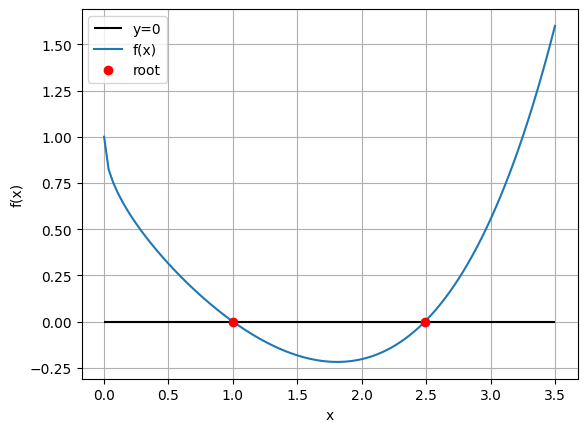

In [8]:
#plotting the function and its roots
x = np.linspace(0, 3.5, 100)
def f(x):
    return np.e**(x-np.sqrt(x))-x
def df(x):
    return np.e**(x-np.sqrt(x))-(1/2)*np.e**(x+np.sqrt(x))
def roots(f, df):
    return -f/df

plt.hlines(0, 0, 3.5, 'k', label='y=0')
plt.plot(x, f(x), label='f(x)')
plt.plot(1, f(1), 'ro', label='root')
plt.plot(2.49091, f(2.49091), 'ro')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Root is at:  1.0
Root is at:  2.4909093169459857
2.0


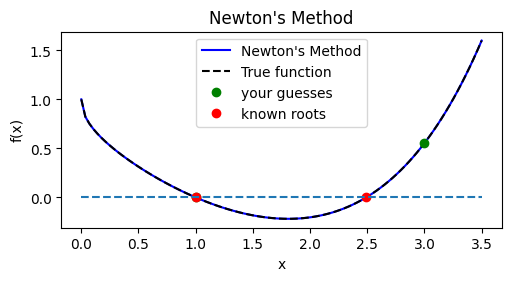

In [9]:
# I recommend using the following initial guesses: 1, 2.5,
roots = [1, 2.49091]
x = np.linspace(0,3.5,100)
fx = np.exp(x - np.sqrt(x)) - x #given function

tol = float(input('Enter tolerance (maybe try 1e-8): '))
n = int(input('How many initial guesses would you like to try? (maybe try 2)'))
if n == 0:
    print('No guesses entered. No solution found.')
    exit()
elif n > 2:
    print('Too many guesses. No solution found.')
    exit()

x0s = [] #these are the initial guesses

def dx(f, x): 
    return abs(0-f(x))

def df(x): 
    if x == 0: #at this point the derivative is zero but the computer doesn't know that
            return 0 #so we'll take the limit of the function to be zero
    else:
        return np.e**(x-np.sqrt(x))-(1/2)*np.e**(x-np.sqrt(x))/np.sqrt(x)

def newtons_method(f, df, x0, tol): 
    delta = dx(f, x0) 
    while delta > tol:
        x0 = x0 - f(x0)/df(x0)
        if df(x0) == 0:
            print('Zero derivative. No solution found.') 
            break
        delta = dx(f, x0) 

    print('Root is at: ', x0)

for i in range(n): 
    x0 = float(input('Enter initial guess: ')) 
    x0s.append(x0)

for x0 in x0s:
    newtons_method(f, df, x0, tol)

print(np.average(np.array(x0s)))

#generic plotting
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
plt.plot(x, f(x), 'b', label='Newton\'s Method')
ax.plot(x,fx,'--k', label="True function")
ax.plot(x0s, f(x0s), 'go', label="your guesses")
plt.plot(roots,f(roots), 'ro', label='known roots')
plt.legend(loc='best')
ax.hlines(y=0,xmin=0,xmax=3.5,ls='--')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title("Newton's Method")
ax.legend()
plt.show()